epoch:0, Train Loss:0.4105, Train Acc0.8743, Test Loss:0.1828, Test Acc:0.9440 
epoch:1, Train Loss:0.1633, Train Acc0.9504, Test Loss:0.1389, Test Acc:0.9558 
epoch:2, Train Loss:0.1176, Train Acc0.9640, Test Loss:0.1148, Test Acc:0.9617 
epoch:3, Train Loss:0.0921, Train Acc0.9714, Test Loss:0.0841, Test Acc:0.9732 
epoch:4, Train Loss:0.0749, Train Acc0.9766, Test Loss:0.0880, Test Acc:0.9734 
epoch:5, Train Loss:0.0666, Train Acc0.9791, Test Loss:0.0827, Test Acc:0.9747 
epoch:6, Train Loss:0.0553, Train Acc0.9821, Test Loss:0.0837, Test Acc:0.9724 
epoch:7, Train Loss:0.0481, Train Acc0.9850, Test Loss:0.0671, Test Acc:0.9794 
epoch:8, Train Loss:0.0430, Train Acc0.9862, Test Loss:0.0732, Test Acc:0.9790 
epoch:9, Train Loss:0.0369, Train Acc0.9878, Test Loss:0.0840, Test Acc:0.9749 


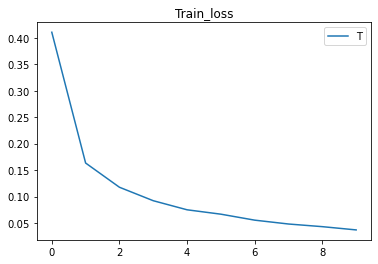

In [12]:
import numpy as np
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import mnist

train_batch_size = 64
test_batch_size = 128
lr = 0.01
momentum = 0.9
maxepoch = 10

#数据的预处理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
train_dataset = mnist.MNIST('./data', train=True, transform=transform, download=True)
test_dataset = mnist.MNIST('./data', train=False, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch_size, shuffle=False)
#构建网络
class Net(nn.Module) :
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim) :
        super(Net, self).__init__()
        '''
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hidden_1), nn.BatchNorm1d(n_hidden_1))
        self.layer2 = nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2), nn.BatchNorm1d(n_hidden_2))
        self.layer3 = nn.Sequential(nn.Linear(n_hidden_2, out_dim))'''
        self.net = nn.Sequential(
            nn.Linear(in_dim, n_hidden_1),
            nn.ReLU(),
            nn.Linear(n_hidden_1, n_hidden_2),
            nn.ReLU(),
            nn.Linear(n_hidden_2, out_dim)
        )
    def forward(self, x) :
        return self.net(x)
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net(28 * 28, 300, 100, 10)
model.to(device)
optimization = optim.SGD(model.parameters(), lr = lr, momentum = momentum)
criterion = nn.CrossEntropyLoss()
#训练
losses_train = []
acces_train = []
losses_test = []
acces_test = []
epoch = 0
while epoch < maxepoch :
    train_loss = 0
    train_acc = 0
    model.train()
    for img, label in train_loader :
        img = img.to(device)
        label = label.to(device)
        img = img.view(img.size(0), -1)#表示第0维的长度
        out = model(img)
        loss = criterion(out, label)
        optimization.zero_grad()
        loss.backward()
        optimization.step()
        train_loss += loss.item()
        _, pred = out.max(1)#表示在第1维比较
        num_correct = (pred == label).sum().item()
        acc = num_correct / img.shape[0]
        train_acc += acc
    losses_train.append(train_loss / len(train_loader))
    acces_train.append(train_acc / len(train_loader))
        #预测
    test_loss = 0
    test_acc = 0
    model.eval()
    for img, label in test_loader:
        img = img.to(device)
        label = label.to(device)
        img = img.view(img.size(0), -1)#表示第0维的长度
        out = model(img)
        loss = criterion(out, label)
        test_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / img.shape[0]
        test_acc += acc
    losses_test.append(test_loss / len(test_loader))
    acces_test.append(test_acc / len(test_loader))
    print('epoch:{}, Train Loss:{:.4f}, Train Acc{:.4f}, Test Loss:{:.4f}, Test Acc:{:.4f} '.format(epoch, 
                                                                                                    train_loss / len(train_loader), train_acc / len(train_loader), 
                                                                                                    test_loss / len(test_loader), test_acc / len(test_loader)))
    epoch += 1
plt.title('Train_loss')
plt.plot(np.arange(len(losses_train)), losses_train)
plt.legend('Train_loss')